# Sentimental Analysis

#  Requirements

In [ ]:
import pandas as pd

In [2]:
df= pd.read_csv(r'C:\Users\shivani\PycharmProjects\pythonProject2\NEP_2020_english_tweet.csv')

In [3]:
df.head(5)

,Unnamed: 0,Author_ID,Date_of_tweet,Tweet,Likes_on_tweet,User_handle,Tweet_link
0,0,60483175,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,venkattcv,https://twitter.com/venkattcv/status/129079263...
1,1,1178900491595636736,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,BethEYoung3,https://twitter.com/BethEYoung3/status/1290792...
2,2,1072481505090318341,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,PatelPrerak18,https://twitter.com/PatelPrerak18/status/12907...
3,3,583518901,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,kchongpacrim,https://twitter.com/kchongpacrim/status/129077...
4,4,36339871,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,SkyscapeInc,https://twitter.com/SkyscapeInc/status/1290754...


In [73]:
#measure central tendency and find all aspects of measurements  
df.describe()

,Author_ID,Likes_on_tweet,Hour,Sentiment_Score,Polarity
count,1.824000e+04,18240.000000,18240.000000,18240.000000,18240.000000
mean,7.123397e+17,9.673026,11.760746,0.271237,0.271237
std,5.360665e+17,93.204689,4.982561,0.407530,0.407530
min,6.509832e+06,0.000000,0.000000,-0.962000,-0.962000
25%,2.314734e+09,0.000000,7.000000,0.000000,0.000000
50%,9.361723e+17,1.000000,13.000000,0.318200,0.318200
75%,1.231108e+18,2.000000,16.000000,0.648600,0.648600
max,1.293167e+18,6138.000000,23.000000,0.979300,0.979300


In [74]:
#basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18240 entries, 0 to 18239
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   Author_ID        18240 non-null  int64              
 1   Date_of_tweet    18240 non-null  datetime64[ns, UTC]
 2   Tweet            18240 non-null  object             
 3   Likes_on_tweet   18240 non-null  int64              
 4   User_handle      18240 non-null  object             
 5   Tweet_link       18240 non-null  object             
 6   Hour             18240 non-null  int64              
 7   Clean_Tweet      18240 non-null  object             
 8   Sentiment_Score  18240 non-null  float64            
 9   Sentiment        18240 non-null  object             
 10  Polarity         18240 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(3), object(5)
memory usage: 1.5+ MB


In [77]:
#total rows and columns 
df.shape

(18240, 11)

In [4]:
df.isnull().sum() # no null values

Unnamed: 0        0
Author_ID         0
Date_of_tweet     0
Tweet             0
Likes_on_tweet    0
User_handle       0
Tweet_link        0
dtype: int64

In [6]:
#delete the unwanted column from the dataset
df.drop(columns= ['Unnamed: 0'], inplace = True)

In [16]:
df.head(10)

,Author_ID,Date_of_tweet,Tweet,Likes_on_tweet,User_handle,Tweet_link
0,60483175,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,venkattcv,https://twitter.com/venkattcv/status/129079263...
1,1178900491595636736,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,BethEYoung3,https://twitter.com/BethEYoung3/status/1290792...
2,1072481505090318341,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,PatelPrerak18,https://twitter.com/PatelPrerak18/status/12907...
3,583518901,2020-08-04 22:20:56+00:00,@PMOIndia’s anti-democratic #NEP2020 was 400+ ...,1,kchongpacrim,https://twitter.com/kchongpacrim/status/129077...
4,36339871,2020-08-04 21:01:14+00:00,The latest The Nursing Education Daily! http:/...,0,SkyscapeInc,https://twitter.com/SkyscapeInc/status/1290754...
5,816750343405060098,2020-08-04 20:33:32+00:00,With Rafale India has strengthened it's defenc...,3,MAHIsouravmaji,https://twitter.com/MAHIsouravmaji/status/1290...
6,1285274012713578496,2020-08-04 20:31:35+00:00,as soon as this pandemic will end I'm going ba...,1,eunwo_oyaa,https://twitter.com/eunwo_oyaa/status/12907472...
7,1449849985,2020-08-04 20:20:16+00:00,Finally those adverts of Amity University and ...,31,tigerAkD,https://twitter.com/tigerAkD/status/1290744384...
8,1253469807942369281,2020-08-04 20:09:06+00:00,"Bollywood is not HINDI Film industry, It's urd...",11,telugu_veera,https://twitter.com/telugu_veera/status/129074...
9,916541521,2020-08-04 20:01:22+00:00,NEP 2020 can propel India's emergence as an ed...,2,BLOnCampus,https://twitter.com/BLOnCampus/status/12907396...


In [7]:
df.columns

Index(['Author_ID', 'Date_of_tweet', 'Tweet', 'Likes_on_tweet', 'User_handle',
       'Tweet_link'],
      dtype='object')

In [8]:
#df['User_handle']= df['User_handle'].str.lower()

# total tweet count

In [62]:
total_tweets = len(df)
print(f"Total tweets: {total_tweets}")

Total tweets: 18240


# Total and Average number of likes

In [16]:
total_likes = df['Likes_on_tweet'].sum()
average_likes = df['Likes_on_tweet'].mean()

print(f"Total likes: {total_likes}")
print(f"Average likes: {average_likes:.2f}")

176436
9.673026315789473


# Most and least liked tweets with all details

In [83]:
most_liked = df.loc[df['Likes_on_tweet'].idxmax()]
least_liked = df.loc[df['Likes_on_tweet'].idxmin()]

print("Most liked tweet:")
print(most_liked)
print('')
print("Least liked tweet:")
print(least_liked)

Most liked tweet:
Author_ID                                                 1065563383
Date_of_tweet                              2020-08-04 12:28:57+00:00
Tweet              First it was #Rafale Then #NEP2020 Tomorrow #R...
Likes_on_tweet                                                  6138
User_handle                                               blsanthosh
Tweet_link         https://twitter.com/blsanthosh/status/12906257...
Hour                                                              12
Clean_Tweet        first it was  then  tomorrow  truly amazing jo...
Sentiment_Score                                               0.8481
Sentiment                                                   Positive
Polarity                                                      0.8481
Name: 257, dtype: object

Least liked tweet:
Author_ID                                        1178900491595636736
Date_of_tweet                              2020-08-04 23:31:56+00:00
Tweet              #HelloStrangerEP6 #Ha

In [69]:
df.dtypes

Author_ID                        int64
Date_of_tweet      datetime64[ns, UTC]
Tweet                           object
Likes_on_tweet                   int64
User_handle                     object
Tweet_link                      object
Hour                             int64
Clean_Tweet                     object
Sentiment_Score                float64
Sentiment                       object
Polarity                       float64
dtype: object

In [70]:
#converting [Date_of_tweet] to pd.to_datetime and [Hour ]to dt.hour
df['Date_of_tweet'] = pd.to_datetime(df['Date_of_tweet'])
df['Hour'] = df['Date_of_tweet'].dt.hour

In [79]:
df.head(3)

,Author_ID,Date_of_tweet,Tweet,Likes_on_tweet,User_handle,Tweet_link,Hour,Clean_Tweet,Sentiment_Score,Sentiment,Polarity
0,60483175,2020-08-04 23:31:59+00:00,Historically #TamilNadu has been a state with ...,1,venkattcv,https://twitter.com/venkattcv/status/129079263...,23,historically has been a state with progressiv...,0.8621,Positive,0.8621
1,1178900491595636736,2020-08-04 23:31:56+00:00,#HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...,0,BethEYoung3,https://twitter.com/BethEYoung3/status/1290792...,23,feeling,0.1280,Positive,0.1280
2,1072481505090318341,2020-08-04 22:22:30+00:00,@cbseindia29 @PMOIndia @narendramodi @DrRPNish...,1,PatelPrerak18,https://twitter.com/PatelPrerak18/status/12907...,22,is trending with its all new features of...,0.6542,Positive,0.6542


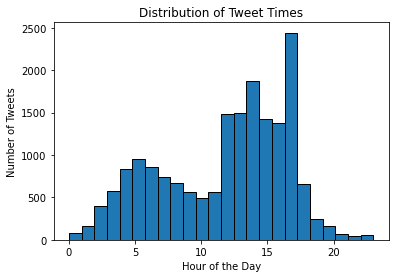

In [72]:
# Plot distribution of tweet times, the time tweets were made
# like in 1 hors how many tweets done so according to 24 hours
import matplotlib.pyplot as plt

plt.hist(df['Hour'], bins=24, edgecolor='k')
plt.title('Distribution of Tweet Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Tweets')
plt.show()

# user analysis

In [81]:
# Top users by count of tweets
top_users = df['User_handle'].value_counts()

# Top user according to total likes
top_users_likes = df.groupby('User_handle')['Likes_on_tweet'].sum().sort_values(ascending=False)

print("Top users by tweet count:")
print(top_users)
print('')
print("Top users by total likes:")
print(top_users_likes)

Top users by tweet count:
Shalini040876      66
DrRPNishank        62
jaganna25145187    60
mygovindia         58
AmbikaPattanaik    57
                   ..
sio_bhilai          1
PrdpRajpurohit      1
myfinology          1
mridula2c           1
Avishkaardotcc      1
Name: User_handle, Length: 5395, dtype: int64

Top users by total likes:
User_handle
DrRPNishank        46110
HRDMinistry        16466
blsanthosh         12271
mygovindia          8991
NAN_DINI_           3872
                   ...  
jatin_rajpoot          0
jatin_gulab            0
jasminepradhan6        0
Rameshchotiya1         0
TapasPanda18           0
Name: Likes_on_tweet, Length: 5395, dtype: int64


In [32]:
#Content Analysis like most common words used in the tweet
from collections import Counter
import re

# Join all tweets into a single string
all_tweets = ' '.join(df['Tweet'])

# Remove punctuation and split into words
words = re.findall(r'\w+', all_tweets.lower())

# Get word frequency using counter
word_freq = Counter(words)

# Most common words
most_common_words = word_freq.most_common(10)
print("Most common words:")
print(most_common_words)


Most common words:
[('the', 22281), ('nep2020', 18936), ('to', 17169), ('of', 15111), ('education', 12965), ('in', 11422), ('a', 9107), ('and', 8217), ('for', 7244), ('is', 7050)]


# Sentimental Analysis

In [33]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

import seaborn as sns

In [53]:
df['Tweet']

0        Historically #TamilNadu has been a state with ...
1        #HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...
2        @cbseindia29 @PMOIndia @narendramodi @DrRPNish...
3        @PMOIndia’s anti-democratic #NEP2020 was 400+ ...
4        The latest The Nursing Education Daily! http:/...
                               ...                        
18235    First it was #Rafale Then #NEP2020 Tomorrow #R...
18236    @KVishReddy sir would like to hear your remark...
18237    While 6% of #GDP Announced 4 #NEP2020 is a #Ju...
18238    Retrograde mindset of the political parties in...
18239    What’s the big problem for political parties i...
Name: Tweet, Length: 18240, dtype: object

In [55]:
# we are cleaning the data like reoving pantuatuion marks
#converting inot lowercase
def clean_tweet(tweet):
    #eliminate all the URLs
    tweet = re.sub(r'http\S+', '', tweet)
   #eliminate all thementions and hashtags
    tweet = re.sub(r'@\w+|#\w+', '', tweet)
   #eliminate all the punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)
   #eliminate all thenumbers
    tweet = re.sub(r'\d+', '', tweet)
    
    #converting into Lowercase because the sentice is case sentisiver
    tweet = tweet.lower()
    return tweet

df['Clean_Tweet'] = df['Tweet'].apply(clean_tweet)
print(df[['Tweet', 'Clean_Tweet']])

                                                   Tweet  \
0      Historically #TamilNadu has been a state with ...   
1      #HelloStrangerEP6 #HarrisonFord #GeorgeFloyd #...   
2      @cbseindia29 @PMOIndia @narendramodi @DrRPNish...   
3      @PMOIndia’s anti-democratic #NEP2020 was 400+ ...   
4      The latest The Nursing Education Daily! http:/...   
...                                                  ...   
18235  First it was #Rafale Then #NEP2020 Tomorrow #R...   
18236  @KVishReddy sir would like to hear your remark...   
18237  While 6% of #GDP Announced 4 #NEP2020 is a #Ju...   
18238  Retrograde mindset of the political parties in...   
18239  What’s the big problem for political parties i...   

                                             Clean_Tweet  
0      historically  has been a state with progressiv...  
1                                                feeling  
2            is trending with its all new features of...  
3      s antidemocratic  was  pgs in  draft

In [ ]:
# Download VADER lexicon
nltk.download('vader_lexicon')

# postive and negative polarity

In [82]:
#using Vader sentiment analyzer for better performace 

sid = SentimentIntensityAnalyzer()

#fimding sentiment score
def get_sentiment(tweet):
    scores = sid.polarity_scores(tweet)
    return scores['compound']

df['Sentiment_Score'] = df['Clean_Tweet'].apply(get_sentiment)

# Catorgarized tweets as positive, negative, or neutral
df['Sentiment'] = df['Sentiment_Score'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

#calclat6ion Polarity 
df['Polarity'] = df['Sentiment_Score']

#cleaned tweets with their sentiment scores and polarity
print(df[['Clean_Tweet', 'Sentiment', 'Polarity']])

                                             Clean_Tweet Sentiment  Polarity
0      historically  has been a state with progressiv...  Positive    0.8621
1                                                feeling  Positive    0.1280
2            is trending with its all new features of...  Positive    0.6542
3      s antidemocratic  was  pgs in  draft and someh...  Positive    0.1280
4      the latest the nursing education daily  thanks...  Positive    0.4404
...                                                  ...       ...       ...
18235  first it was  then  tomorrow  truly amazing jo...  Positive    0.8481
18236   sir would like to hear your remarks on  draft...  Positive    0.0094
18237  while  of  announced   is a  can v expect anot...   Neutral    0.0000
18238  retrograde mindset of the political parties in...  Positive    0.7964
18239  whats the big problem for political parties in...  Positive    0.8402

[18240 rows x 3 columns]


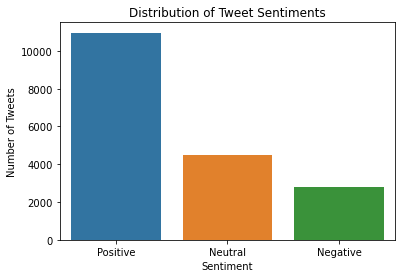

In [43]:
# Plot distribution of sentiments
sns.countplot(x='Sentiment', data=df)
plt.title('Distribution of Tweet Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

#positive: presence of postive words
#negative: presence of negative words
#neural: prsence of both + and - words eyqually


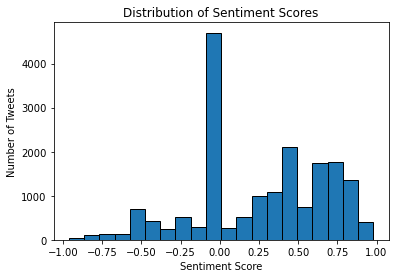

In [45]:
# Plot sentiment scores
plt.hist(df['Sentiment_Score'], bins=20, edgecolor='k')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Number of Tweets')
plt.show()


# POSITIVE and NEGATIVE TWEETS Graph

In [47]:
# Separate positive and negative tweets
positive_tweets = df[df['Sentiment'] == 'Positive']
negative_tweets = df[df['Sentiment'] == 'Negative']

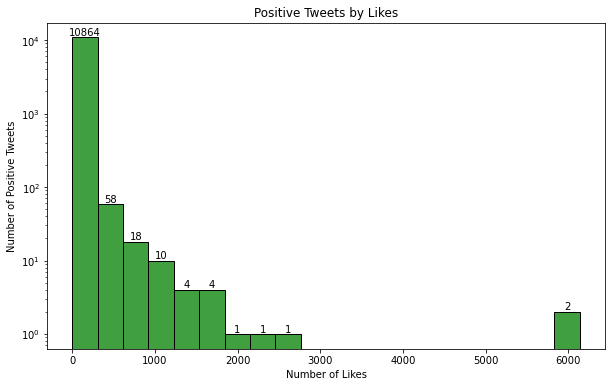

In [91]:
# Plot positive tweets with log scaling on y-axis
plt.figure(figsize=(10, 6))
x=sns.histplot(positive_tweets['Likes_on_tweet'], bins=20, kde=False,color= 'Green')
plt.yscale('log')
plt.title('Positive Tweets by Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Positive Tweets')
for p in x.patches:
    height = p.get_height()
    if height > 0:  # Only add label if height is non-zero
        plt.text(p.get_x() + p.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom')


plt.show()

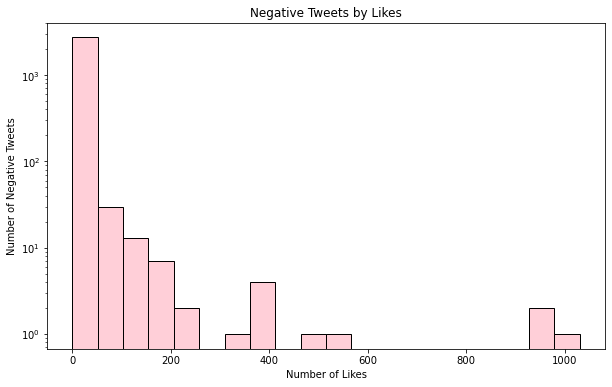

In [95]:
# Plot negative tweets with log scaling on y-axis
plt.figure(figsize=(10, 6))
sns.histplot(negative_tweets['Likes_on_tweet'], bins=20, kde=False,color='pink')
plt.yscale('log')
plt.title('Negative Tweets by Likes')
plt.xlabel('Number of Likes')
plt.ylabel('Number of Negative Tweets')

plt.show()